[Github](https://github.com/leon-pscl/CPE312_Predictive_Analytics_Using_Machine_Learning/blob/1b0fa7349fa4e10a63820b625805687fce26e2c1/Midterm/HOA4.2/Hands_on_Activity_4_2_Support_Vector_Machines.ipynb)

# Activity 4.2 Support Vector Machines

Objective(s):

This activity aims to perform classification  using Support Vector Machines

Intended Learning Outcomes (ILOs):
* Build the model using Support Vector Machines.
* Evaluate the performance of the model.
* Choose the best parameters using Grid Search.

Resources:
* Jupyter Notebook
* Breast Cancer

Procedure:

Import the libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Use the built in breast cancer dataset from Scikit Learn

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

The data set is presented in a dictionary form:

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [9]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Setup the dataframe using Pandas

In [10]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [13]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Split the data into a training set and a testing set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

Train the Support Vector Classifier

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC()

In [18]:
model.fit(X_train,y_train)

SVC()

Now let's predict using the trained model.

In [19]:
predictions = model.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(y_test,predictions))

[[ 56  10]
 [  3 102]]


In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [23]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [24]:
from sklearn.model_selection import GridSearchCV

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [25]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [27]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [28]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [29]:
grid_predictions = grid.predict(X_test)

In [30]:
print(confusion_matrix(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


In [31]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## Supplementary Activity:



* Choose your own dataset
* Import the dataset


In [32]:
import pandas as pd
titanic = pd.read_csv("/content/drive/MyDrive/SCHOOLFILES/CPE31/CPE312/PrelimExam/titanic_all.csv")
titanic.head()

,Passenger,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


* Determine the number of datapoints, columns and data types


In [33]:
print("Datapoints (rows):", titanic.shape[0])
print("Columns:", titanic.shape[1])


Datapoints (rows): 1308
Columns: 12


In [34]:
titanic.dtypes

,0
Passenger,int64
Survived,int64
Pclass,int64
Name,object
Gender,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .


In [35]:
#this ain't important in making a model
titanic_drop = titanic.drop(["Passenger", "Name", "Ticket", "Cabin"], axis=1)
titanic_drop.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


In [36]:
titanic_drop.isnull().sum()

,0
Survived,0
Pclass,0
Gender,0
Age,263
SibSp,0
Parch,0
Fare,0
Embarked,2


In [66]:
#>>>Handle missing values
#Make a copy to edit
titanic_edit1 = titanic_drop.copy()

titanic_edit1["Age"] = titanic_edit1["Age"].fillna(titanic_edit1["Age"].median())
titanic_edit1["Embarked"] = titanic_edit1["Embarked"].fillna(titanic_edit1["Embarked"].mode()[0])
titanic_edit1["Fare"] = titanic_edit1["Fare"].fillna(titanic_edit1["Fare"].median())

titanic_edit1.head()


,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


In [67]:
titanic_edit1.isnull().sum()

,0
Survived,0
Pclass,0
Gender,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [68]:
from sklearn.preprocessing import LabelEncoder

#Encode Sex (male/female to 0/1)
titanic_edit1["Gender"] = LabelEncoder().fit_transform(titanic_edit1["Gender"])

#Encode Embarked (C/Q/S to 0/1/2)
titanic_edit1["Embarked"] = LabelEncoder().fit_transform(titanic_edit1["Embarked"])
titanic_edit1.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,0,1,0,2.0000,1,2,151.5500,2
3,0,1,1,30.0000,1,2,151.5500,2
4,0,1,0,25.0000,1,2,151.5500,2


* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode


In [69]:
from sklearn.preprocessing import StandardScaler

#Choose features
X = titanic_edit1.drop("Survived", axis=1)
y = titanic_edit1["Survived"]

#Initialize scaler
scaler = StandardScaler()

#Fit on training data and transform
X_scaled = scaler.fit_transform(X)

#Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,-1.545283,-1.344198,-0.037237,-0.479312,-0.445203,3.441165,0.622609
1,-1.545283,0.743938,-2.218170,0.480780,1.865614,2.285603,0.622609
2,-1.545283,-1.344198,-2.134042,0.480780,1.865614,2.285603,0.622609
3,-1.545283,0.743938,0.040423,0.480780,1.865614,2.285603,0.622609
4,-1.545283,-1.344198,-0.347874,0.480780,1.865614,2.285603,0.622609


In [70]:
#descriptive statistics
titanic_edit1.describe()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,0.382263,2.294343,0.643731,29.479485,0.499235,0.385321,33.295479,1.493119
std,0.486126,0.837929,0.479079,12.881658,1.041965,0.865826,51.758668,0.814435
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


* Perform data visualization


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-4220694133.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=titanic_edit1, palette="Set2")


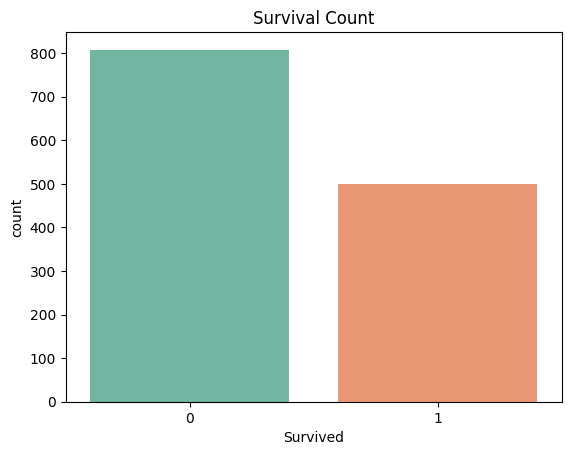

In [72]:
sns.countplot(x="Survived", data=titanic_edit1, palette="Set2")
plt.title("Survival Count")
plt.show()

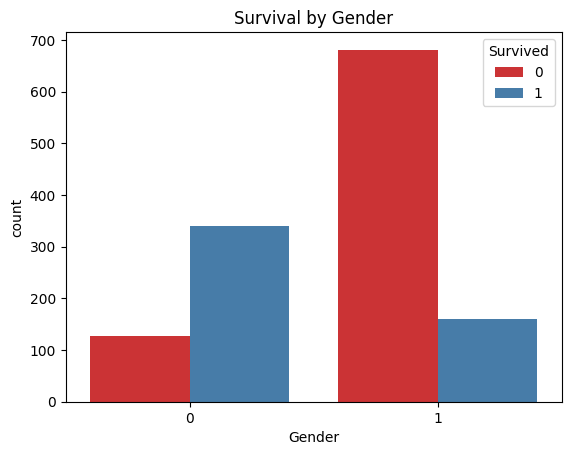

In [73]:
sns.countplot(x="Gender", hue="Survived", data=titanic_edit1, palette="Set1")
plt.title("Survival by Gender")
plt.show()

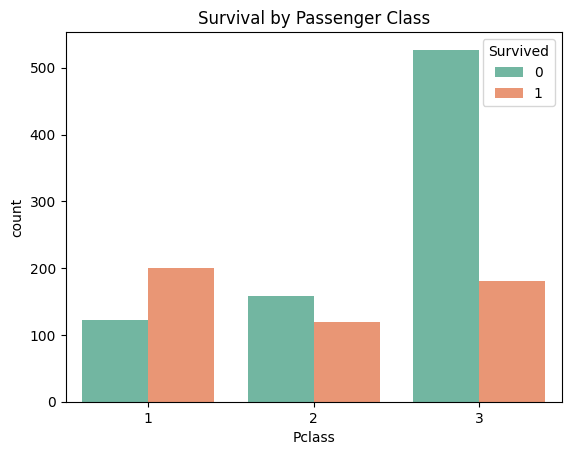

In [74]:
sns.countplot(x="Pclass", hue="Survived", data=titanic_edit1, palette="Set2")
plt.title("Survival by Passenger Class")
plt.show()

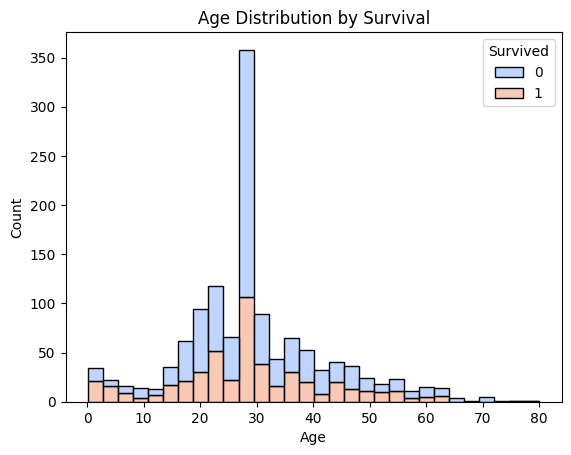

In [75]:
sns.histplot(data=titanic_edit1, x="Age", hue="Survived", multiple="stack", bins=30, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()

* Build the model using SVM.


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [117]:
#Features (exclude target column "Survived")
X = titanic_edit1.drop("Survived", axis=1)

#Target
y = titanic_edit1["Survived"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()

#Fit only on training data
X_train = scaler.fit_transform(X_train)

#Apply same transformation to test data
X_test = scaler.transform(X_test)

#Initialize SVM
svm_model = SVC(kernel="rbf", C=0.5, gamma="auto", random_state=69)

#Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring="accuracy")


#Train
svm_model.fit(X_train, y_train)



SVC(C=0.5, gamma='auto', random_state=69)

* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score


In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix
)

#Predictions
y_pred = svm_model.predict(X_test)
#cross-validation results
print("Cross-validation scores:", cv_scores)

#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Mean CV accuracy:", np.mean(cv_scores))
#Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Cross-validation scores: [0.83060109 0.84153005 0.80874317 0.78688525 0.7704918 ]
Accuracy: 0.806615776081425
Mean CV accuracy: 0.8076502732240437

Confusion Matrix:
 [[201  29]
 [ 47 116]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       230
           1       0.80      0.71      0.75       163

    accuracy                           0.81       393
   macro avg       0.81      0.79      0.80       393
weighted avg       0.81      0.81      0.80       393



* Determine the best parameter using grid search.

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Define parameter grid
param_grid = {
    "C": [0.1, 0.5, 1, 10],
    "gamma": ["auto"],
    "kernel": ["rbf","sigmoid"]
}

#Initialize GridSearch with cross-validation
grid = GridSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_grid=param_grid,
    cv=5,#3-fold cross validation
    scoring="accuracy", # optimize for accuracy
    verbose=2,
    n_jobs=-1#use all CPU cores
)

#Fit on training data
grid.fit(X_train, y_train)

#Best parameters
print("Best Parameters:", grid.best_params_)

#Best model
best_svm = grid.best_estimator_

#Evaluate on test set
y_pred = best_svm.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.7989821882951654


## Conclusion:

In this activity, I was able to build a model using support vector machines (SVM) to predict the likelihood of survival of a passenger in the Titanic based on their Gender, Passenger Class, and Age. With a 70/30 train-test split, the model was able to achieve around 78% to 80% accuracy, with GridSearch helping a lot to determine the regularization parameter (C) value to achieve the highest accuracy.

Cross-validation also helped in assessing the model's accuracy.

I have learned a few trends in using SVM models, which include manipulating the regularization parameter (C) value to achieve better results. A lower value signifies a wider margin and increased tolerance for misclassified points, risking underfitting, while a higher margin does the opposite.

